In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Set plots style
plt.style.use('seaborn-v0_8-paper')

In [2]:
df = pd.read_csv('data/final_labels.csv')
df.shape

(10339, 6)

In [3]:
df.head()

,channel,image,label,choice,choice_no_lc,label_no_lc
0,atres,frame_atres_noche_2024-05-17_sec_1310.jpg,not_war,not_war,not_war,not_war
1,atres,frame_atres_noche_2024-05-17_sec_1290.jpg,not_war,not_war,not_war,not_war
2,atres,frame_atres_noche_2024-05-17_sec_1270.jpg,not_war,not_war,not_war,not_war
3,atres,frame_atres_noche_2024-05-17_sec_1250.jpg,not_war,not_war,not_war,not_war
4,atres,frame_atres_noche_2024-05-17_sec_1230.jpg,not_war,not_war,not_war,not_war


In [4]:
df.groupby(['label', 'choice']).size()

label               choice                       
low_confidence_war  low_confidence_war                983
not_war             not_war                          7843
war                 damaged_infrastructure            364
                    damaged_infrastructure&anchor     135
                    military                          746
                    military&anchor                   268
dtype: int64

In [5]:
df.groupby(['label_no_lc', 'choice_no_lc']).size()

label_no_lc  choice_no_lc                 
not_war      not_war                          8179
war          damaged_infrastructure            686
             damaged_infrastructure&anchor     176
             military                          978
             military&anchor                   320
dtype: int64

In [6]:
grouped_counts = df.groupby('choice_no_lc').size()

# Convert to DataFrame
df_grouped_counts = pd.DataFrame({'label': grouped_counts.index, 'count': grouped_counts.values})
df_grouped_counts

,label,count
0,damaged_infrastructure,686
1,damaged_infrastructure&anchor,176
2,military,978
3,military&anchor,320
4,not_war,8179


In [7]:
# Replace labels as requested
df_grouped_counts['label'] = df_grouped_counts['label'].replace({'damaged_infrastructure&anchor': 'Damaged Infrastructure'})
df_grouped_counts['label'] = df_grouped_counts['label'].replace({'damaged_infrastructure': 'Damaged Infrastructure'})

df_grouped_counts['label'] = df_grouped_counts['label'].replace({'military': 'Military'})
df_grouped_counts['label'] = df_grouped_counts['label'].replace({'military&anchor': 'Military'})
df_grouped_counts['label'] = df_grouped_counts['label'].replace({'not_war': 'Not War'})

# Group by the updated labels
grouped_counts = df_grouped_counts.groupby('label')['count'].sum().reset_index()

# Display the grouped DataFrame
grouped_counts

,label,count
0,Damaged Infrastructure,862
1,Military,1298
2,Not War,8179


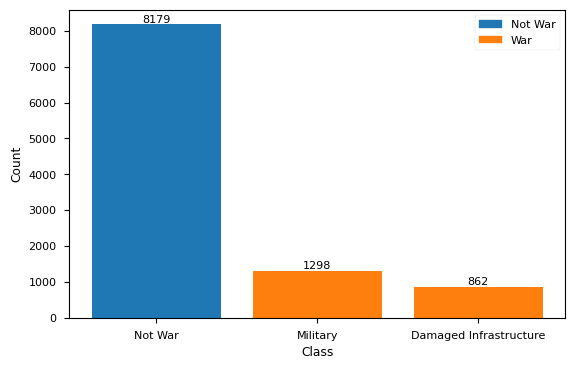

In [8]:
# Sort the DataFrame by count in descending order
grouped_counts_sorted = grouped_counts.sort_values(by='count', ascending=False)

# Set the style
plt.style.use('seaborn-v0_8-paper')

# Set the size of the chart
plt.figure(figsize=(6.4, 4))

# Get the default color cycle from the current style
default_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Define colors for bars based on the label
colors = [default_colors[0] if label == 'Not War' else default_colors[1] for label in grouped_counts_sorted['label']]

# Plot the bar chart with custom colors
bars = plt.bar(grouped_counts_sorted['label'], grouped_counts_sorted['count'], color=colors)

# Add title to the chart
# plt.title('Label Count')

# Add x-axis and y-axis titles
plt.xlabel('Class')
plt.ylabel('Count')


# Add numbers on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=8)
    
    
# Create custom legend handles
not_war_patch = mpatches.Patch(color=default_colors[0], label='Not War')
war_patch = mpatches.Patch(color=default_colors[1], label='War')

# Add legend to the plot
plt.legend(handles=[not_war_patch, war_patch])
    
plt.savefig(
    'report_charts/LabelsDistribution.pdf',
    bbox_inches='tight',
)

# Show the plot
plt.show()


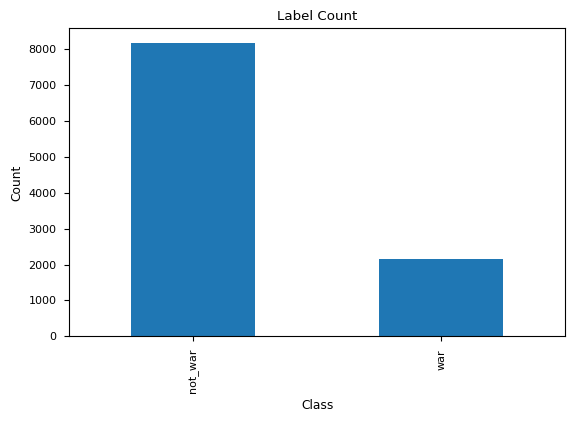

In [10]:
grouped_counts_label = df.groupby('label_no_lc').size()

# Sort the counts in descending order
grouped_counts_label_sorted = grouped_counts_label.sort_values(ascending=False)

# Set the size of the chart
plt.figure(figsize=(6.4, 4))

# Plotting the bar chart
ax = grouped_counts_label_sorted.plot(kind='bar')
plt.title('Label Count')
plt.xlabel('Class')
plt.ylabel('Count')

plt.show()

## Train/Val/Test split and save as csv

In [10]:
# Define proportions for train, validation, and test sets
train_size = 0.7
val_size = 0.15
test_size = 0.15

# Calculate size of dfs based on proportions
num_total = len(df)
num_train = int(train_size * num_total)
num_val = int(val_size * num_total)
num_test = num_total - num_train - num_val

# Randomly shuffle the DataFrame rows
df_shuffled = df.sample(frac=1)  # Shuffling for randomness

# Split the shuffled DataFrame into train, validation, and test DataFrames
df_train = df_shuffled.iloc[:num_train]
df_val = df_shuffled.iloc[num_train:num_train + num_val]
df_test = df_shuffled.iloc[num_train + num_val:]

# Reset indicies
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

# Save dataframes
df_train.to_csv('data/train_labels.csv', index=False)
df_val.to_csv('data/val_labels.csv', index=False)
df_test.to_csv('data/test_labels.csv', index=False)